# Example with pycaret

## Setup

In [1]:
import pandas as pd
import numpy as np

from pycaret.regression import *
from sklearn.datasets import fetch_california_housing

In [2]:
# get data
df_raw = fetch_california_housing(as_frame=True)['frame']

df = df_raw.sample(frac=0.6, random_state=42)
df_unseen = df_raw.drop(df.index)

print(f'Data for modeling: {df.shape}')
print(f'Data for prediction: {df_unseen.shape}')

Data for modeling: (12384, 9)
Data for prediction: (8256, 9)


## Modeling

In [3]:
# set up pycaret
exp = setup(
    data = df,
    target = 'MedHouseVal', 
    session_id = 42,
    fold = 5,
    normalize = True, 
    transformation = True, transform_target = True, 
    rare_to_value = 0.05,
    remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
    bin_numeric_features = [],
    log_experiment = False, 
    experiment_name = 'california',
    verbose = False)
pull() # we use verbose=False and pull because otherwise colored tables are not visible in dark mode 

,Description,Value
0,Session id,42
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(12384, 9)"
4,Transformed data shape,"(12384, 9)"
5,Transformed train set shape,"(8668, 9)"
6,Transformed test set shape,"(3716, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
# list models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [5]:
# compare many models and save best (or top-n list)
topn = compare_models(
    n_select = 3,
    sort = 'RMSE',
    verbose = False)
pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3433,0.2708,0.5202,0.7959,0.1530,0.1808,0.078
et,Extra Trees Regressor,0.3565,0.2981,0.5458,0.7753,0.1591,0.1874,0.450
rf,Random Forest Regressor,0.3730,0.3201,0.5655,0.7587,0.1669,0.1992,0.790
gbr,Gradient Boosting Regressor,0.3866,0.3261,0.5708,0.7542,0.1677,0.2044,0.420
knn,K Neighbors Regressor,0.4380,0.4066,0.6375,0.6934,0.1920,0.2398,0.052
huber,Huber Regressor,0.4669,0.4435,0.6657,0.6657,0.2012,0.2541,0.026
br,Bayesian Ridge,0.4724,0.4487,0.6696,0.6617,0.2010,0.2581,0.022
lar,Least Angle Regression,0.4724,0.4486,0.6696,0.6618,0.2010,0.2581,0.024
lr,Linear Regression,0.4724,0.4486,0.6696,0.6618,0.2010,0.2581,0.694
ridge,Ridge Regression,0.4724,0.4487,0.6696,0.6618,0.2010,0.2581,0.024


## Single model

In [6]:
# create a single decision tree
dt = create_model('dt', fold=5, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5293,0.6366,0.7978,0.5068,0.2400,0.2944
1,0.5257,0.6022,0.7760,0.5586,0.2343,0.2883
2,0.5334,0.6082,0.7799,0.5294,0.2333,0.2930
3,0.5093,0.5695,0.7547,0.5566,0.2264,0.2718
4,0.5178,0.6154,0.7845,0.5612,0.2344,0.2829
Mean,0.5231,0.6064,0.7786,0.5425,0.2337,0.2861
Std,0.0086,0.0218,0.0140,0.0212,0.0043,0.0082


In [7]:
# tune the model hyperparameters
tuned_dt = tune_model(dt, n_iter=20, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4400,0.4194,0.6476,0.6751,0.1965,0.2450
1,0.4718,0.4671,0.6834,0.6576,0.2094,0.2630
2,0.4571,0.4304,0.6560,0.6670,0.2021,0.2518
3,0.4411,0.4135,0.6430,0.6781,0.1944,0.2342
4,0.4876,0.5029,0.7092,0.6414,0.2125,0.2642
Mean,0.4595,0.4466,0.6678,0.6639,0.2030,0.2517
Std,0.0183,0.0337,0.0250,0.0133,0.0070,0.0113


In [8]:
# bagging
bagged_dt = ensemble_model(tuned_dt, method='Bagging', n_estimators=50, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4031,0.3644,0.6036,0.7177,0.1812,0.2252
1,0.4128,0.3650,0.6042,0.7324,0.1803,0.2260
2,0.3953,0.3271,0.5719,0.7469,0.1727,0.2147
3,0.4087,0.3714,0.6095,0.7108,0.1801,0.2157
4,0.4171,0.3815,0.6176,0.7280,0.1821,0.2245
Mean,0.4074,0.3619,0.6014,0.7272,0.1793,0.2212
Std,0.0076,0.0185,0.0156,0.0125,0.0034,0.0049


In [9]:
# bagging
boosted_dt = ensemble_model(tuned_dt, method='Boosting', n_estimators=50, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3949,0.3341,0.5780,0.7411,0.1718,0.2217
1,0.4100,0.3314,0.5757,0.7571,0.1684,0.2219
2,0.3947,0.3050,0.5522,0.7640,0.1637,0.2151
3,0.3953,0.3303,0.5747,0.7429,0.1662,0.2085
4,0.4192,0.3520,0.5933,0.7490,0.1732,0.2250
Mean,0.4028,0.3306,0.5748,0.7508,0.1687,0.2184
Std,0.0101,0.0150,0.0131,0.0086,0.0035,0.0059


In [10]:
best = tune_model(topn[0], verbose = False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3855,0.3336,0.5776,0.7415,0.1735,0.2141
1,0.3912,0.3283,0.5730,0.7593,0.1677,0.2066
2,0.3739,0.2949,0.5431,0.7718,0.1631,0.2007
3,0.3781,0.3225,0.5679,0.7490,0.1660,0.1966
4,0.3944,0.3419,0.5847,0.7563,0.1718,0.2086
Mean,0.3846,0.3242,0.5692,0.7556,0.1684,0.2053
Std,0.0077,0.0160,0.0142,0.0102,0.0038,0.0061


## Result analys

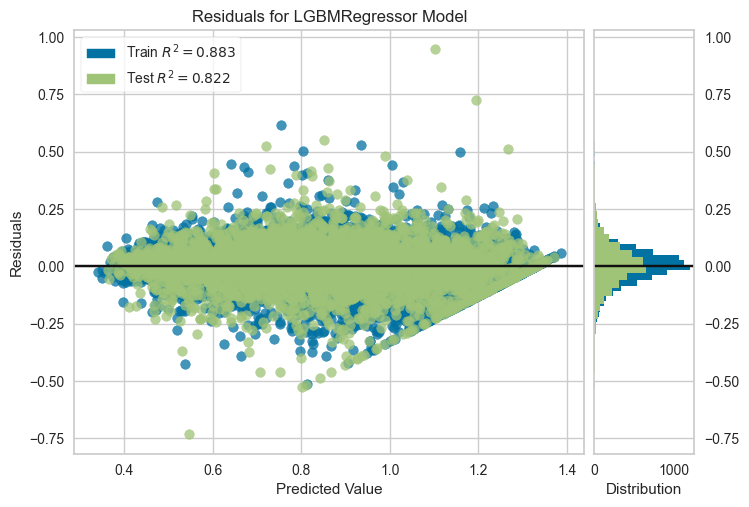

In [11]:
plot_model(best)
# or evaluate_model() which opens an interactive window

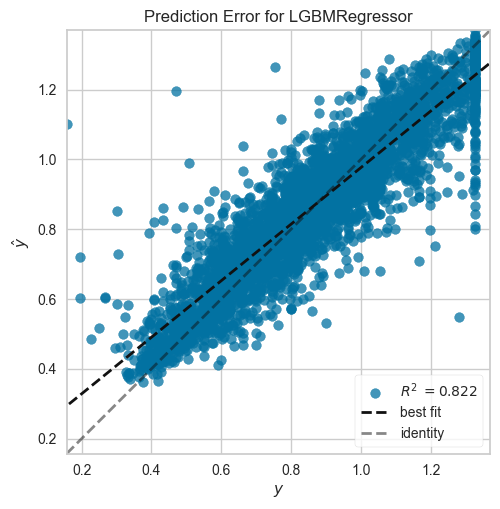

In [12]:
plot_model(best, 'error')

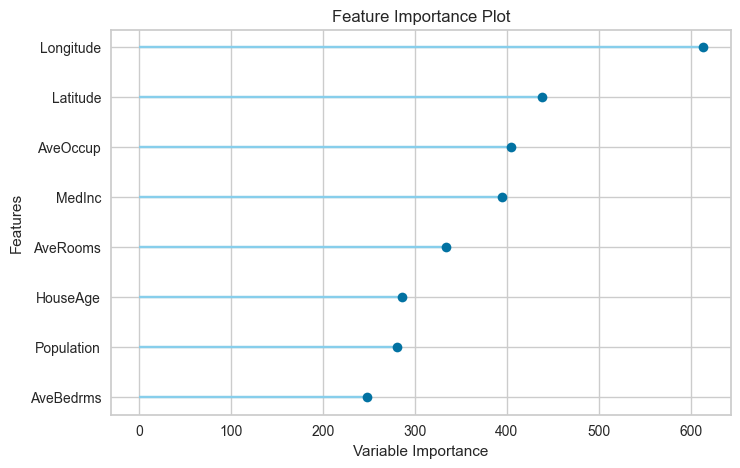

In [13]:
plot_model(best, 'feature')

In [14]:
plot_model(best, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


## Finalize and predict

In [15]:
# train final model on train + test data
final_model = finalize_model(best) 

In [16]:
preds_unseen = predict_model(final_model, data=df_unseen)
preds_unseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0731,0.0103,0.1017,0.8280,0.0553,0.0937


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.585,1.209315
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,3.422,0.949667
2,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.840000,-122.250000,2.611,0.954487
3,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.849998,-122.260002,2.418,0.988500
4,3.0750,52.0,5.322649,1.012820,1098.0,2.346154,37.849998,-122.260002,2.135,0.832534


In [17]:
# secondo me il predict è buggato

## Save and reload

In [18]:
save_model(final_model, 'model011123')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\alepi\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitu...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.95))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize',

In [19]:
m = load_model('model011123')
predict_model(m, data=df_unseen).head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0731,0.0103,0.1017,0.8280,0.0553,0.0937


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.585,1.209315
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,3.422,0.949667
2,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.840000,-122.250000,2.611,0.954487
3,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.849998,-122.260002,2.418,0.988500
4,3.0750,52.0,5.322649,1.012820,1098.0,2.346154,37.849998,-122.260002,2.135,0.832534
